In [143]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [144]:
import zipfile
with zipfile.ZipFile("archive (5).zip", 'r') as z:
    z.extractall()
    print(z.namelist())

['insurance.csv']


In [145]:
df=pd.read_csv('insurance.csv')
df.head()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     1338 non-null   int64  
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 83.8+ KB


In [147]:
df.shape

(1338, 8)

In [148]:
df.duplicated().sum()

np.int64(0)

In [149]:
df.describe()

,index,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,668.500000,39.207025,30.663397,1.094918,13270.422265
std,386.391641,14.049960,6.098187,1.205493,12110.011237
min,0.000000,18.000000,15.960000,0.000000,1121.873900
25%,334.250000,27.000000,26.296250,0.000000,4740.287150
50%,668.500000,39.000000,30.400000,1.000000,9382.033000
75%,1002.750000,51.000000,34.693750,2.000000,16639.912515
max,1337.000000,64.000000,53.130000,5.000000,63770.428010


Distribution Summary:

           count          mean           std        min         25%       50%  \
age       1338.0     39.207025     14.049960    18.0000    27.00000    39.000   
bmi       1338.0     30.663397      6.098187    15.9600    26.29625    30.400   
children  1338.0      1.094918      1.205493     0.0000     0.00000     1.000   
charges   1338.0  13270.422265  12110.011237  1121.8739  4740.28715  9382.033   

                   75%          max  
age          51.000000     64.00000  
bmi          34.693750     53.13000  
children      2.000000      5.00000  
charges   16639.912515  63770.42801  

Skewness:
 age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64


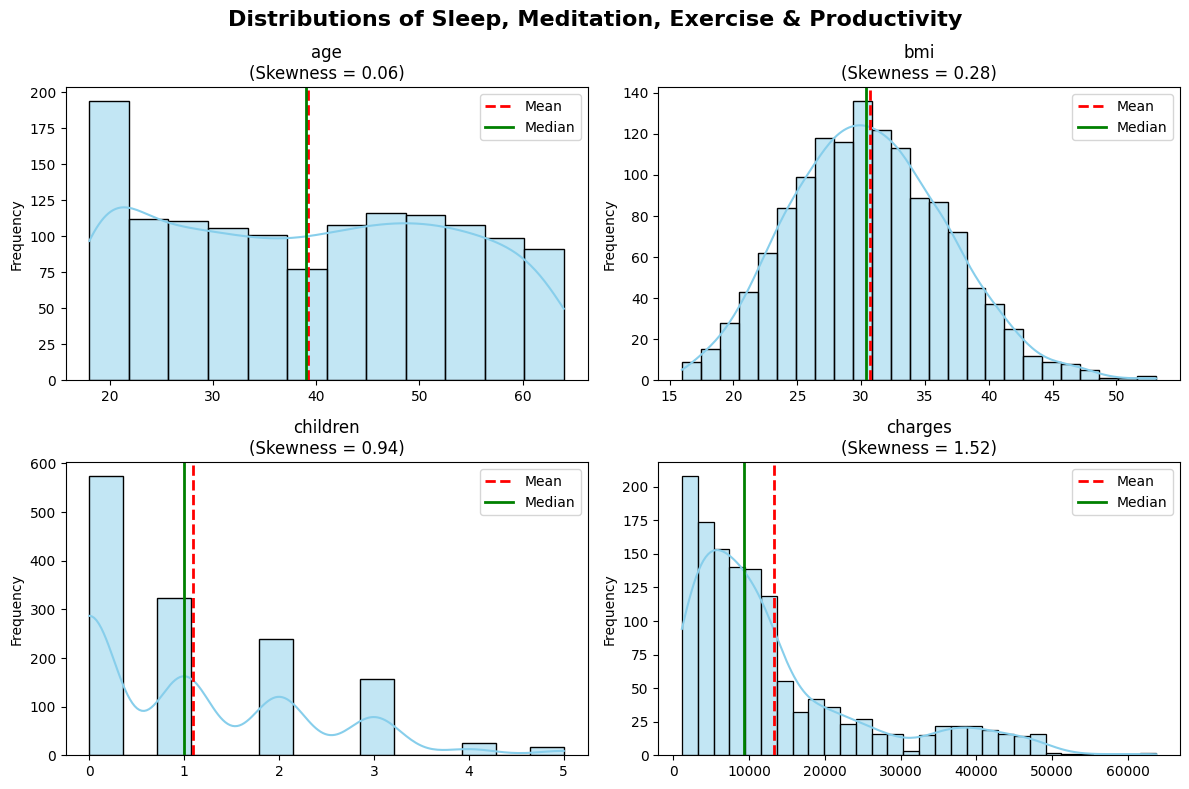

In [150]:
cols = ['age', 'bmi', 'children', 'charges']
num_df = df[cols]

print("Distribution Summary:\n")
print(num_df.describe().T)

print("\nSkewness:\n", num_df.skew())

plt.figure(figsize=(12, 8))

for i, col in enumerate(cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(num_df[col], kde=True, color='skyblue', edgecolor='black')
   
    plt.axvline(num_df[col].mean(), color='red', linestyle='--', linewidth=2, label='Mean')
    plt.axvline(num_df[col].median(), color='green', linestyle='-', linewidth=2, label='Median')
    
    plt.title(f'{col}\n(Skewness = {num_df[col].skew():.2f})')
    plt.xlabel('')
    plt.ylabel('Frequency')
    plt.legend()

plt.suptitle('Distributions of Sleep, Meditation, Exercise & Productivity', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [151]:
skew_value = df['age'].skew()
print("Skewness of age:", skew_value)

Skewness of age: 0.05567251565299186


In [152]:
skew_value = df['bmi'].skew()
print("Skewness of bmi:", skew_value)

Skewness of bmi: 0.2840471105987448


In [153]:
skew_value = df['children'].skew()
print("Skewness of children:", skew_value)

Skewness of children: 0.9383804401702414


In [154]:
skew_value = df['charges'].skew()
print("Skewness of charges:", skew_value)

Skewness of charges: 1.5158796580240388


In [155]:
(df['charges'] == 0).sum()

np.int64(0)

In [156]:
(df['charges'] <0).sum()


np.int64(0)

In [157]:
df['charges_log'] = np.log1p(df['charges'])
df.head()

,index,age,sex,bmi,children,smoker,region,charges,charges_log
0,0,19,female,27.900,0,yes,southwest,16884.92400,9.734236
1,1,18,male,33.770,1,no,southeast,1725.55230,7.453882
2,2,28,male,33.000,3,no,southeast,4449.46200,8.400763
3,3,33,male,22.705,0,no,northwest,21984.47061,9.998137
4,4,32,male,28.880,0,no,northwest,3866.85520,8.260455


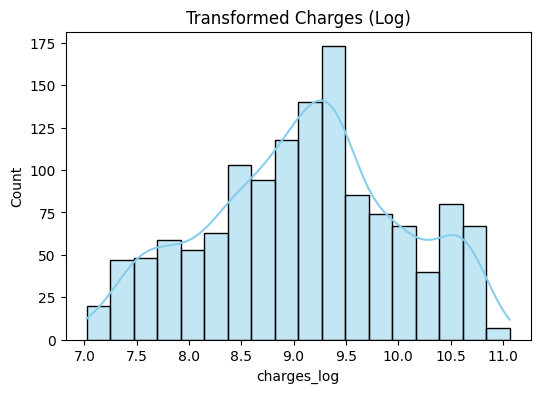

In [158]:
plt.figure(figsize=(6,4))
sns.histplot(df['charges_log'], kde=True, color='skyblue')
plt.title("Transformed Charges (Log)")
plt.show()

In [159]:
df['charges_log'].skew()

np.float64(-0.08981728740026824)

In [160]:
df.value_counts('smoker')

smoker
no     1064
yes     274
Name: count, dtype: int64

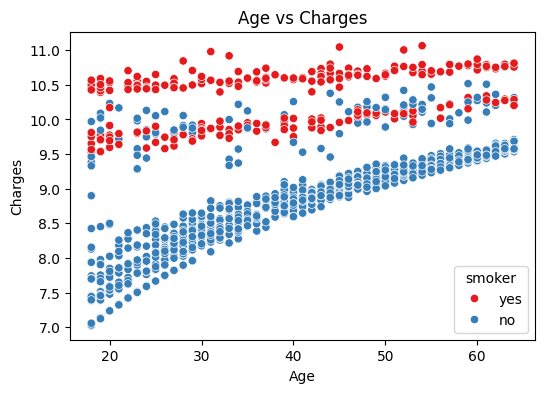

In [161]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='age', y='charges_log', hue='smoker',palette='Set1')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

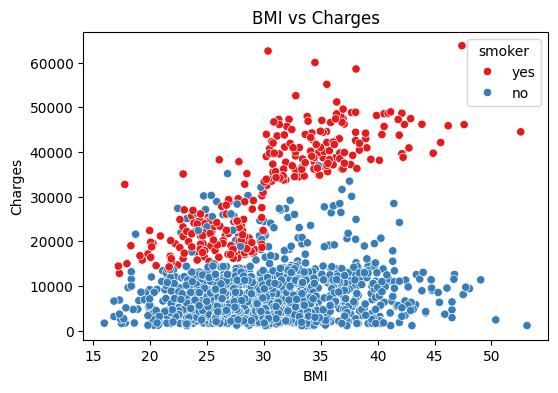

In [162]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker',palette='Set1')
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

In [163]:
top_charges=df.sort_values(by='charges', ascending=False).head(3)
print(top_charges[['age','sex','bmi','charges','smoker']])

      age     sex     bmi      charges smoker
543    54  female  47.410  63770.42801    yes
1300   45    male  30.360  62592.87309    yes
1230   52    male  34.485  60021.39897    yes


In [164]:
top_bmi=df.sort_values(by='bmi', ascending=False).head(3)
print(top_bmi[['age','sex','bmi','charges','smoker']])

      age   sex    bmi     charges smoker
1317   18  male  53.13   1163.4627     no
1047   22  male  52.58  44501.3982    yes
847    23  male  50.38   2438.0552     no


In [165]:
df_encoded=pd.get_dummies(df, columns=['sex','smoker','region'],drop_first=True)
df_encoded.head()

,index,age,bmi,children,charges,charges_log,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,19,27.900,0,16884.92400,9.734236,False,True,False,False,True
1,1,18,33.770,1,1725.55230,7.453882,True,False,False,True,False
2,2,28,33.000,3,4449.46200,8.400763,True,False,False,True,False
3,3,33,22.705,0,21984.47061,9.998137,True,False,True,False,False
4,4,32,28.880,0,3866.85520,8.260455,True,False,True,False,False


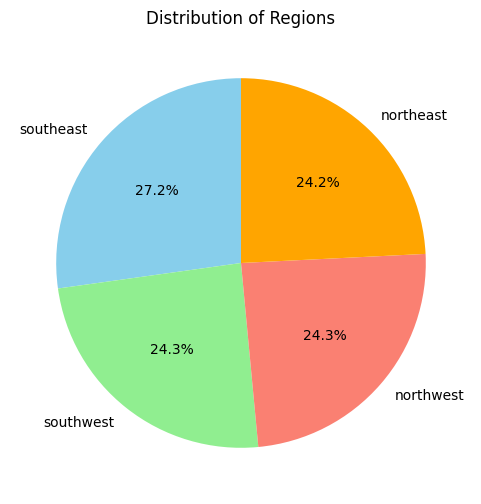

In [166]:
region_counts=df['region'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('Distribution of Regions')
plt.show()

In [167]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['sex']=encoder.fit_transform(df['sex'])
df['smoker']=encoder.fit_transform(df['smoker'])
df['region']=encoder.fit_transform(df['region'])
df.head(3)

,index,age,sex,bmi,children,smoker,region,charges,charges_log
0,0,19,0,27.90,0,1,3,16884.9240,9.734236
1,1,18,1,33.77,1,0,2,1725.5523,7.453882
2,2,28,1,33.00,3,0,2,4449.4620,8.400763


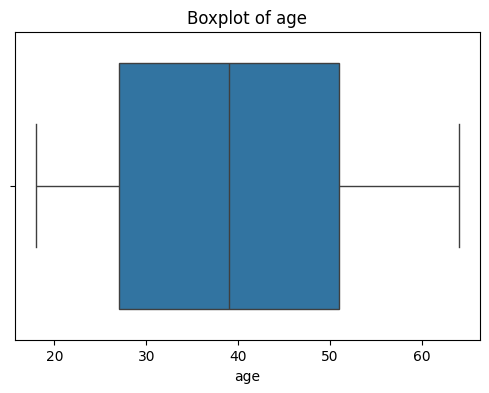

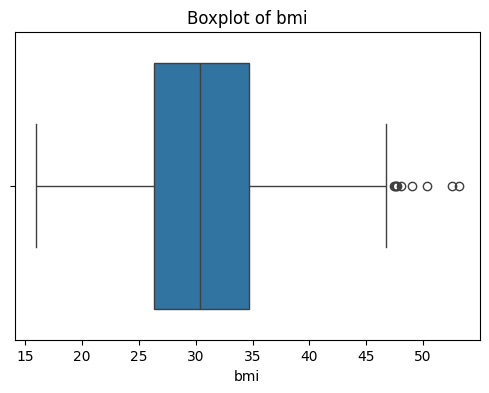

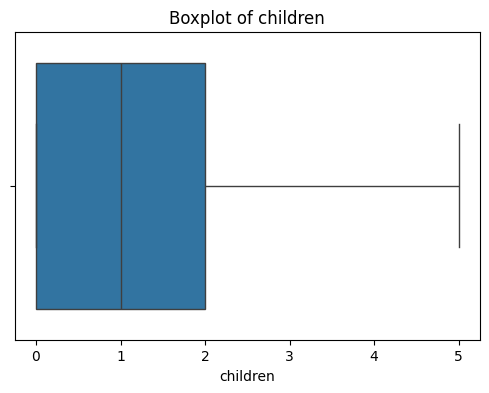

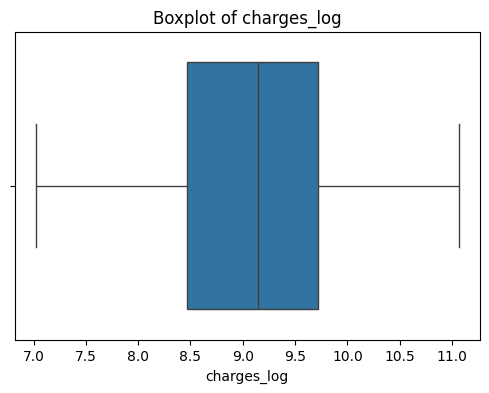

In [173]:
numeric_cols = ['age', 'bmi', 'children', 'charges_log']

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [169]:
df.drop(columns=['index'], inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_log
0,19,0,27.900,0,1,3,16884.92400,9.734236
1,18,1,33.770,1,0,2,1725.55230,7.453882
2,28,1,33.000,3,0,2,4449.46200,8.400763
3,33,1,22.705,0,0,1,21984.47061,9.998137
4,32,1,28.880,0,0,1,3866.85520,8.260455


In [170]:
correlation=df['bmi'].corr(df['charges'])
print(correlation)

0.1983409688336289


In [171]:
df.shape

(1338, 8)

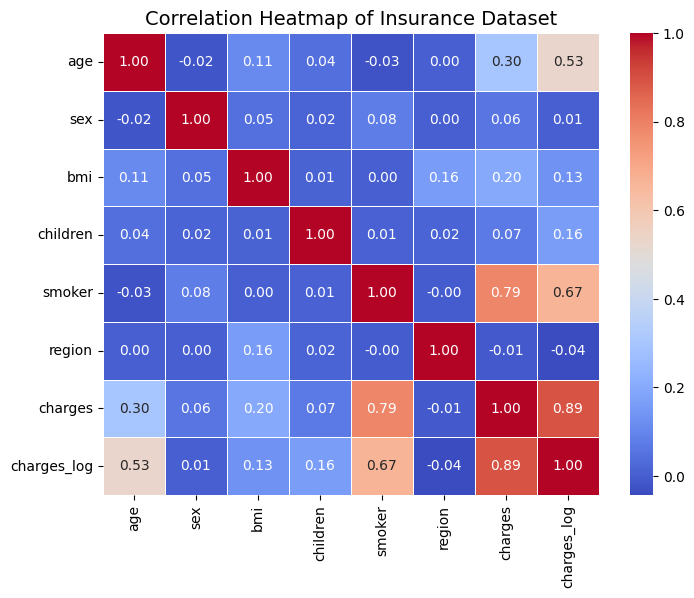

In [172]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Insurance Dataset', fontsize=14)
plt.show()


Mean Charges by Smoker Status:
smoker
0     8.788436
1    10.304146
Name: charges_log, dtype: float64

Mean Charges by Number of Children:
children
0    8.935393
1    9.094965
2    9.298381
3    9.369020
4    9.359118
5    9.001230
Name: charges_log, dtype: float64

Mean Charges by Smoker Status:
smoker
0     8434.268298
1    32050.231832
Name: charges, dtype: float64

Mean Charges by Number of Children:
children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges, dtype: float64


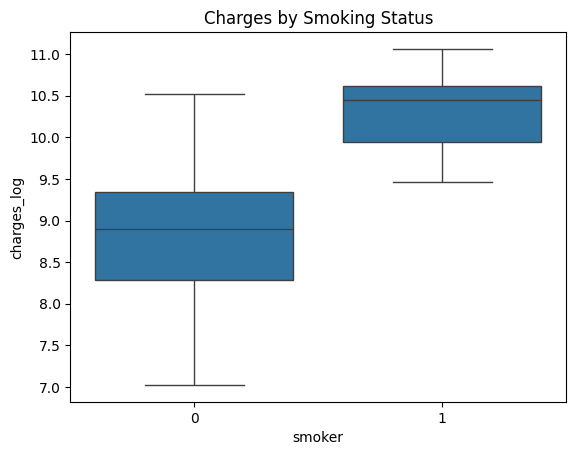

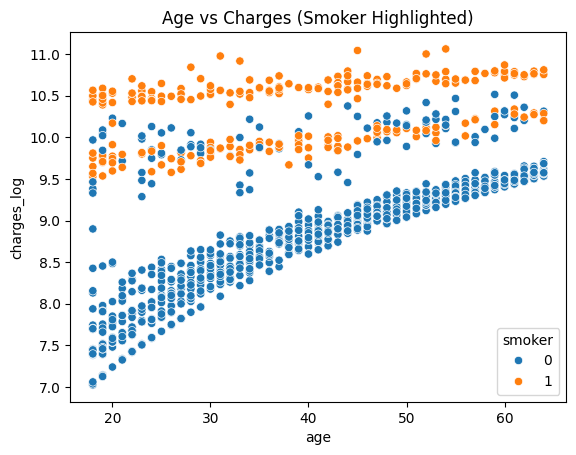

In [177]:
print("\nMean Charges by Smoker Status:")
print(df.groupby('smoker')['charges_log'].mean())

print("\nMean Charges by Number of Children:")
print(df.groupby('children')['charges_log'].mean())

print("\nMean Charges by Smoker Status:")
print(df.groupby('smoker')['charges'].mean())

print("\nMean Charges by Number of Children:")
print(df.groupby('children')['charges'].mean())

sns.boxplot(x='smoker', y='charges_log', data=df)
plt.title('Charges by Smoking Status')
plt.show()
sns.scatterplot(x='age', y='charges_log', data=df, hue='smoker')
plt.title('Age vs Charges (Smoker Highlighted)')
plt.show()
